# hmm test

The hmm was spitting out kinda crap results, so I reran it on the constitution to see if I borked something.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bidict
import re

import literate
import HMM2 as HMM

In [2]:
data_raw = open("data/constitution.txt").read()
len(data_raw)

26392

In [3]:
# coopied from assignment 6
def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []
        
        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            obs_elem.append(obs_map[word])
        
        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map


In [4]:
nummed, wmap = parse_observations(data_raw)
wmap = bidict.bidict(wmap)
print(len(wmap), "distinct words\n",
      sum([len(l) for l in nummed]), "words")

883 distinct words
 4493 words


In [5]:
# copied from hmm.ipynb
nstates = [2,4,8,12,16]
hmms = []
curves = []
for n in nstates:
    print("STATES", n)
    hmm,s = HMM.unsupervised(nummed, N_iters=20, n_states=n)
    hmms.append(hmm)
    curves.append(s)
hmm = hmms[-1]

STATES 2
Training 20 iters
1  3  5  7  9  11  13  15  17  19  
elapsed 8.304900169372559
STATES 4
Training 20 iters
1  3  5  7  9  11  13  15  17  19  
elapsed 13.686163425445557
STATES 8
Training 20 iters
1  3  5  7  9  11  13  15  17  19  
elapsed 22.87326431274414
STATES 12
Training 20 iters
1  3  5  7  9  11  13  15  17  19  
elapsed 32.41998291015625
STATES 16
Training 20 iters
1  3  5  7  9  11  13  15  17  19  
elapsed 40.12538528442383


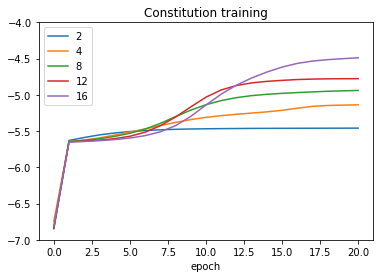

In [11]:
# copied from hmm.ipynb
for i,c in zip(nstates,curves):
    plt.plot(c, label=i)
plt.ylim(-7,-4)
plt.title("Constitution training")
plt.xlabel("epoch")
plt.legend()

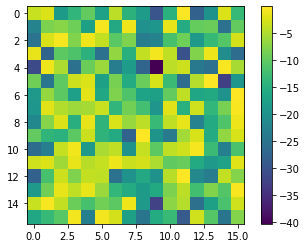

In [7]:
plt.imshow(np.log(hmm.A))
plt.colorbar()

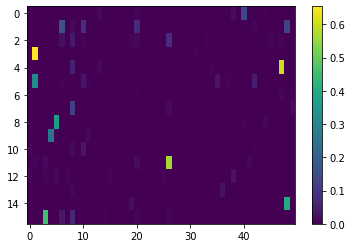

In [8]:
plt.imshow(hmm.O[:,:50], aspect="auto")
plt.colorbar()

In [13]:
em, st = HMM.generate_emission(hmm, 20)
" ".join([wmap.inv[i] for i in em])

'make the duties right of the executive number of the officers states of taxes united states shall in full into'